In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

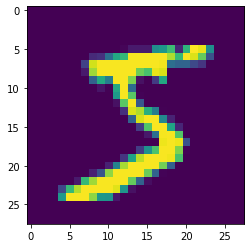

In [3]:
plt.imshow(X_train[0])

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
X_train[0].dtype

dtype('uint8')

In [6]:
print(X_train[0].max())
print(X_test[0].max())

255
255


In [7]:
X_train = keras.utils.normalize(X_train, axis = 1)
X_test = keras.utils.normalize(X_test, axis = 1)
print(X_train[0].max())
print(X_test[0].max())

0.92705966211359
0.9001142474626551


In [8]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [9]:
y_train.dtype

dtype('uint8')

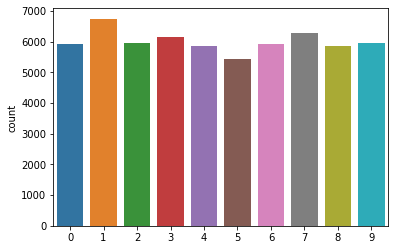

In [10]:
sns.countplot(y_train)

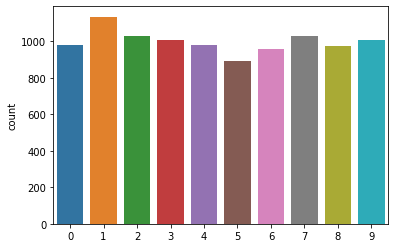

In [11]:
sns.countplot(y_test)

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(activation = 'relu', units = 128),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(activation = 'relu', units = 128),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(activation = 'relu', units = 128),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(activation = 'softmax', units = 10)
])

In [13]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [14]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 15,
    batch_size = 64
)

Epoch 1/15
938/938 [==============================] - 27s 29ms/step - loss: 0.4193 - accuracy: 0.8727 - val_loss: 0.1569 - val_accuracy: 0.9521
Epoch 2/15
938/938 [==============================] - 22s 23ms/step - loss: 0.2067 - accuracy: 0.9383 - val_loss: 0.1204 - val_accuracy: 0.9620
Epoch 3/15
938/938 [==============================] - 22s 23ms/step - loss: 0.1646 - accuracy: 0.9503 - val_loss: 0.1050 - val_accuracy: 0.9691
Epoch 4/15
938/938 [==============================] - 25s 26ms/step - loss: 0.1407 - accuracy: 0.9569 - val_loss: 0.0934 - val_accuracy: 0.9728
Epoch 5/15
938/938 [==============================] - 26s 28ms/step - loss: 0.1221 - accuracy: 0.9622 - val_loss: 0.0925 - val_accuracy: 0.9712
Epoch 6/15
938/938 [==============================] - 24s 26ms/step - loss: 0.1136 - accuracy: 0.9656 - val_loss: 0.0875 - val_accuracy: 0.9734
Epoch 7/15
938/938 [==============================] - 23s 25ms/step - loss: 0.1036 - accuracy: 0.9682 - val_loss: 0.0841 - val_accuracy:

Best validation loss:  0.07095172256231308
Best validation accuracy:  0.9800999760627747


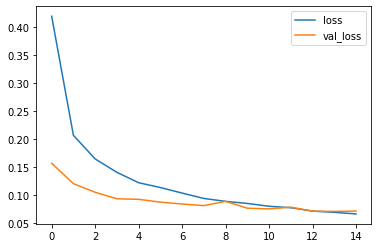

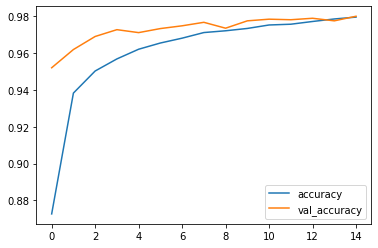

In [15]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print('Best validation loss: ', history_df['val_loss'].min()) 
print('Best validation accuracy: ', history_df['val_accuracy'].max())         

In [16]:
model.save('digit_recognizer.h5')

In [17]:
scores = model.evaluate(X_test, y_test)
print(scores)

313/313 [==============================] - 4s 12ms/step - loss: 0.0714 - accuracy: 0.9801
[0.07141268998384476, 0.9800999760627747]
